# Продуктовые и маркетинговые метрики

В проекте анализируется поведение пользователей на сайте по продаже билетов на мероприятия, осуществляемые ими заказы и приносимый доход, в сопоставлении со способом их привлечения и маркетинговыми затратами. 

Цель: сформулировать рекомендации по оптимизации маркетинговых затрат.

### Описание данных

Данные о посещениях сайта, таблица visits
    * uid — уникальный идентификатор пользователя
    * device — категория устройства пользователя
    * start_ts — дата и время начала сессии
    * end_ts — дата и время окончания сессии
    * source_id — идентификатор рекламного источника, из которого пришел пользователь
    
Данные о покупках, таблица orders
    * uid — уникальный id пользователя, который сделал заказ
    * buy_ts — дата и время заказа
    * revenue — выручка с этого заказа

Данные о маркетинговых расходах, таблица costs
    * source_id — идентификатор рекламного источника
    * dt — дата
    * costs — затраты на этот рекламный источник в этот день

### Оглавление

<a href='#step1'> Шаг 1. Подготовка данных. </a>

<a href='#step11'> Выводы по шагу 1. </a>


<a href='#step2'> Шаг 2. Метрики. </a>

<a href='#step21'> 2.1. Метрики продукта. </a>

<a href='#step22'> 2.2. Метрики продаж. </a>

<a href='#step23'> 2.3. Метрики маркетинга. </a>

<a href='#step24'> Summary по шагу. Основные метрики. </a>


<a href='#step3'> Шаг 3. Обший вывод и рекомендации. </a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

<a id='step1'></a>

# Шаг 1. Подготовка данных

In [3]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
visits

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [7]:
orders

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [9]:
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [10]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
orders.columns = ['buy_ts', 'revenue', 'uid']
costs.columns = ['source_id', 'marketing_date', 'costs']

In [11]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['marketing_date'] = pd.to_datetime(costs['marketing_date'])

In [12]:
costs['payment_month'] = costs['marketing_date'].astype('datetime64[M]')

In [13]:
visits['start_ts'].min()

Timestamp('2017-06-01 00:01:00')

In [14]:
visits['start_ts'].max()

Timestamp('2018-05-31 23:59:00')

In [15]:
# Считаем продолжительность сессии в секундах

visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()

In [16]:
len(visits.query('session_duration <= 0'))

35796

In [17]:
# Исключаем наблюдения с отрицательной или нулевой продолжительностью сессии.

visits = visits[visits['session_duration'] > 0].reset_index(drop=True)

In [18]:
visits['session_date'] = visits['start_ts'].dt.date
visits['session_week'] = visits['start_ts'].dt.week
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')

In [19]:
orders['order_date'] = orders['buy_ts'].dt.date
orders['order_week'] = orders['buy_ts'].dt.week
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

<a id='step11'></a>

## Выводы по шагу

Были загружены в переменные как датафреймы данные о визитах, заказах и расходах. 

Все данные о времени были приведены к типу datetime. 

В датафрейме visits была посчитана и добавлена продолжительность каждой сессии. Обнаружилось, что в 35796 из 359400 наблюдений продолжительность сессии меньше либо равна 0 (то есть сессия закончилась не позднее, чем началась). Соответствующие им строки были исключены, так как эти наблюдения, вероятно, следствие ошибки либо технической особенности, которую необходимо прояснить.



<a id='step2'></a>

# Шаг 2. Метрики

<a id='step21'></a>

## Метрики продукта

In [20]:
# Функция для отрисовки графиков. На входе три названия колонок из датафрейма visits и строка
# с названием временного периода для оформления графиков: первый аргумент -- что хотим считать, 
# количество сессий или количество пользователей (колонки 'start_ts' / 'uid'), второй аргумент --
# категориальная разбивка, на основе которой будем сравнивать подсчитанный показатель ('source_id' / 'device'), 
# третий аргумент -- какие временные промежутки будем сравнивать ('session_date' / 'session_week' /
# 'session_month', последний аргумент -- соответствующая третьему строка со словом ('день' / 'неделя' / 'месяц'))

def metric_ill(wut, subj, div, name):
    fig, ax = plt.subplots(figsize=(12,9))
    if wut == 'uid':
        z = visits.groupby([subj, div])[wut].nunique().reset_index()
        sns.barplot(x=subj, y=wut, data=z, capsize=0.05, ax=ax)
        if subj == 'source_id': 
            plt.xlabel('Идентификатор рекламного источника')
            plt.ylabel('Уникальных пользователей')
            plt.title('Среднее количество пользователей в '+name)
        if subj == 'device':
            plt.xlabel('Тип устройства')
            plt.ylabel('Уникальных пользователей')
            plt.title('Среднее количество пользователей в '+name)
    if wut == 'start_ts':
        z = visits.groupby([subj, div])[wut].count().reset_index()
        sns.barplot(x=subj, y=wut, data=z, capsize=0.05, ax=ax)
        if subj == 'source_id': 
            plt.xlabel('Идентификатор рекламного источника')
            plt.ylabel('Сессий')
            plt.title('Среднее количество сессий в '+name)
        if subj == 'device':
            plt.xlabel('Тип устройства')
            plt.ylabel('Сессий')
            plt.title('Среднее количество сессий в '+name)
    plt.show()

### Количество сессий

In [21]:
avg_sessions_per_day = visits.groupby('session_date')['start_ts'].count().mean()
print('Среднее количество сессий в день: {:.0f}'.format(avg_sessions_per_day))

Среднее количество сессий в день: 889


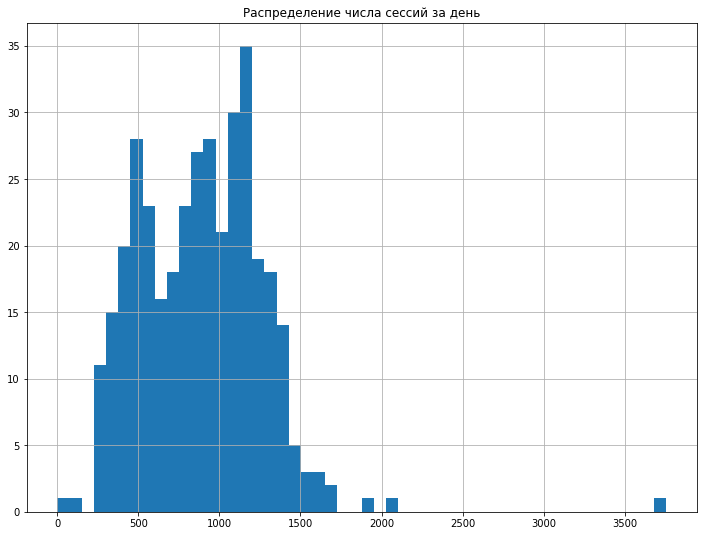

count     364.000000
mean      889.021978
std       383.086457
min         1.000000
25%       575.000000
50%       898.000000
75%      1153.750000
max      3755.000000
Name: start_ts, dtype: float64

In [22]:
visits.groupby('session_date')['start_ts'].count().hist(figsize=(12,9), bins=50)
plt.title('Распределение числа сессий за день')
plt.show()
visits.groupby('session_date')['start_ts'].count().describe()

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


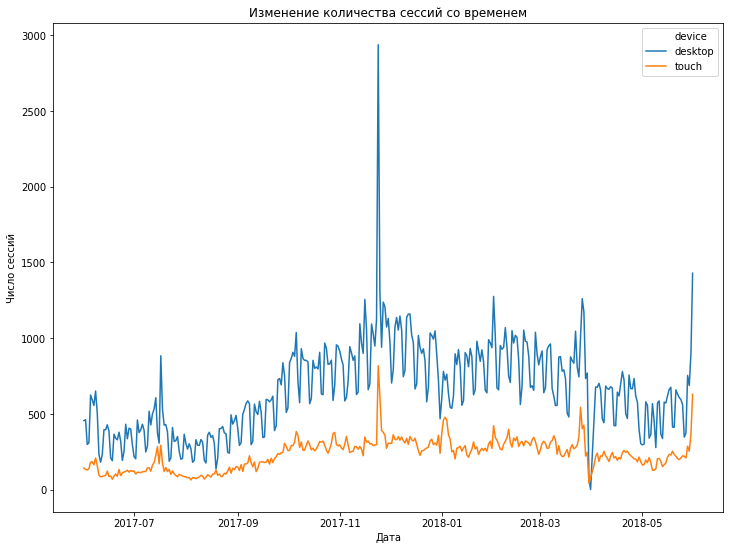

In [23]:
vis = visits.groupby(['device','session_date'])['start_ts'].count().reset_index()
plt.figure(figsize=(12, 9))
sns.lineplot(vis['session_date'], vis['start_ts'], hue=vis['device'])
plt.ylabel('Число сессий')
plt.xlabel('Дата')
plt.title('Изменение количества сессий со временем')
plt.show()

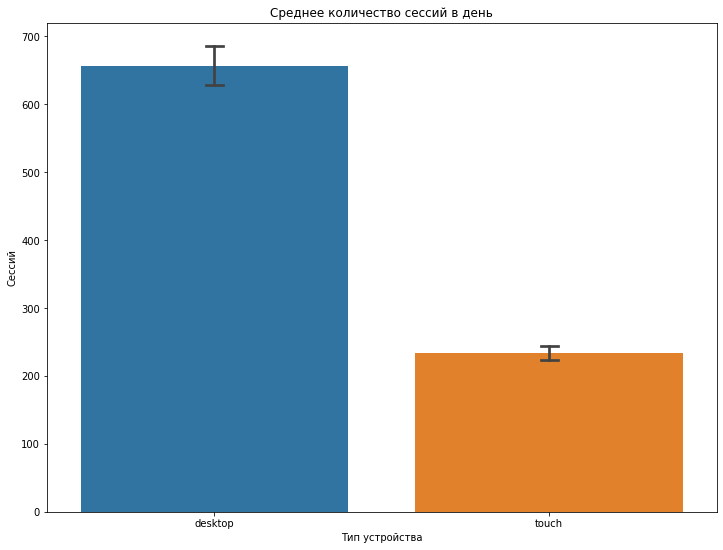

In [24]:
metric_ill('start_ts', 'device', 'session_date', 'день')

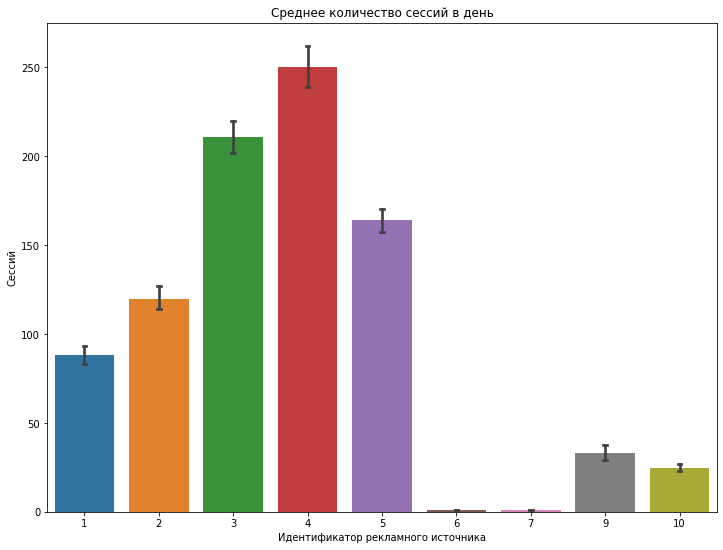

In [25]:
metric_ill('start_ts', 'source_id', 'session_date', 'день')

#### Количество сессий: summary

Распределение ежедневного количества сессий бимодально, с пиками в районе 550 и 1150 сессий в день, что характеризует использование сервиса в будние и праздничные/выходные дни. Это же можно увидеть и на периодическом графике изменения количества сессий со временем. 

В среднем в день на сайт заходят 889 раз, в половине из всех дней эта величина находится в диапазоне от 575 до 1153. Максимальная загруженность наблюдалась в предновогодние дни, тогда на сайт зашли 3755 раз. 

Со стационарных устройств заходят приблизительно в три раза чаще, чем с портативных (~660 и ~230 ежедневных подключений соответственно). Чаще всего пользователи переходят с четвртого рекламного источника. 

### Число уникальных пользователей

In [26]:
avg_users_per_day = visits.groupby('session_date')['uid'].nunique().mean()
print('Среднее количество уникальных пользователей в день:', round(avg_users_per_day, 1))

Среднее количество уникальных пользователей в день: 817.6


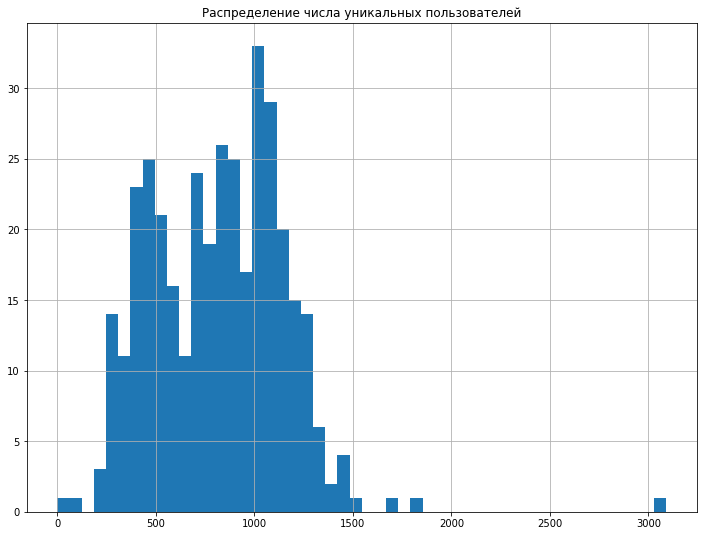

In [27]:
visits.groupby('session_date')['uid'].nunique().hist(figsize=(12,9), bins=50)
plt.title('Распределение числа уникальных пользователей')
plt.show()

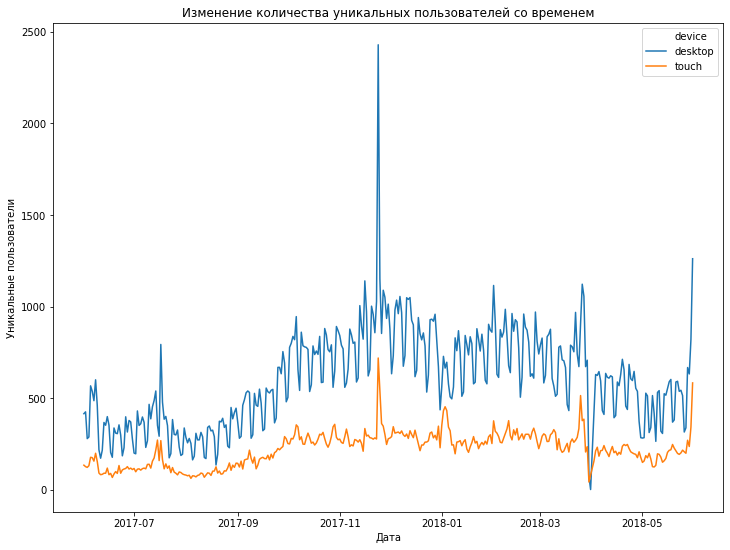

In [28]:
vis = visits.groupby(['device','session_date'])['uid'].nunique().reset_index()
plt.figure(figsize=(12, 9))
sns.lineplot(vis['session_date'], vis['uid'], hue=vis['device'])
plt.ylabel('Уникальные пользователи')
plt.xlabel('Дата')
plt.title('Изменение количества уникальных пользователей со временем')
plt.show()

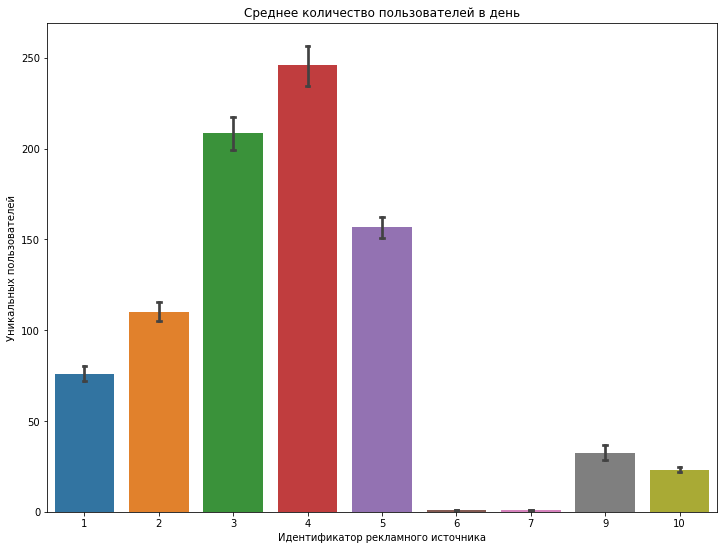

In [29]:
metric_ill('uid', 'source_id', 'session_date', 'день')

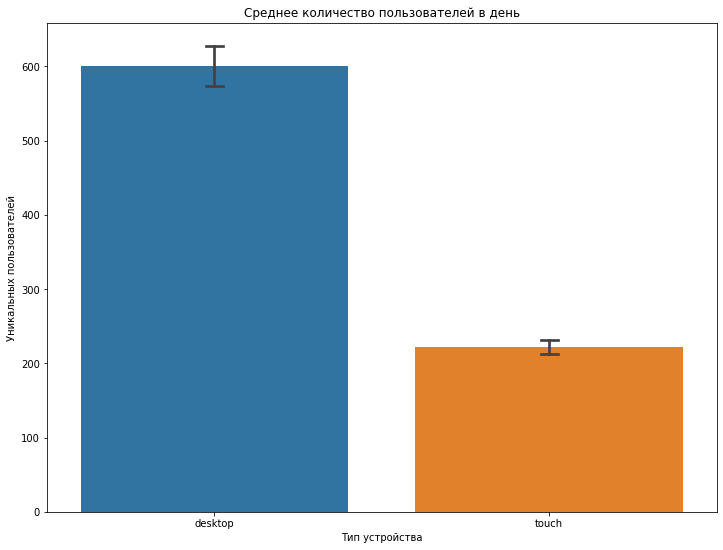

In [30]:
metric_ill('uid', 'device', 'session_date', 'день')

In [31]:
users_per_month = visits.groupby('session_month')['uid'].nunique()
avg_users_per_month = users_per_month.mean()

print('Число уникальных пользователей за каждый месяц: \n', users_per_month, end='\n\n')
print('Среднее количество уникальных пользователей в месяц:', round(avg_users_per_month, 1))

Число уникальных пользователей за каждый месяц: 
 session_month
2017-06-01    11885
2017-07-01    12725
2017-08-01    10465
2017-09-01    17117
2017-10-01    26794
2017-11-01    29745
2017-12-01    28593
2018-01-01    25930
2018-02-01    25955
2018-03-01    24872
2018-04-01    18821
2018-05-01    18566
Name: uid, dtype: int64

Среднее количество уникальных пользователей в месяц: 20955.7


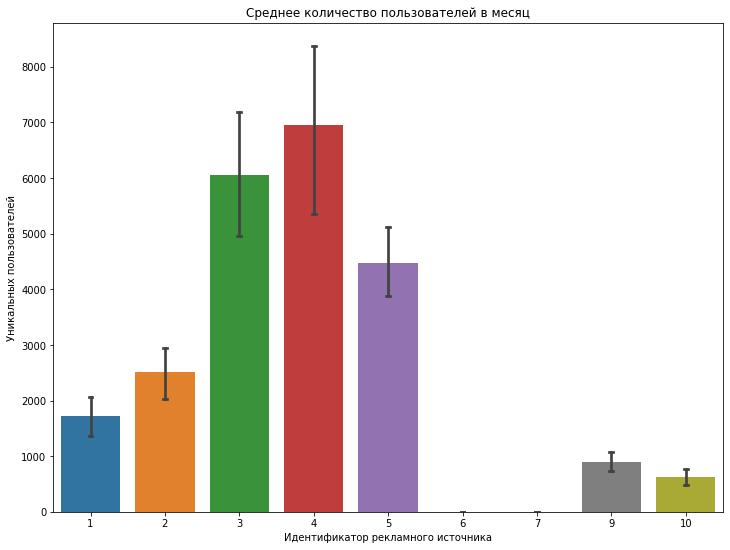

In [32]:
metric_ill('uid', 'source_id', 'session_month', 'месяц')

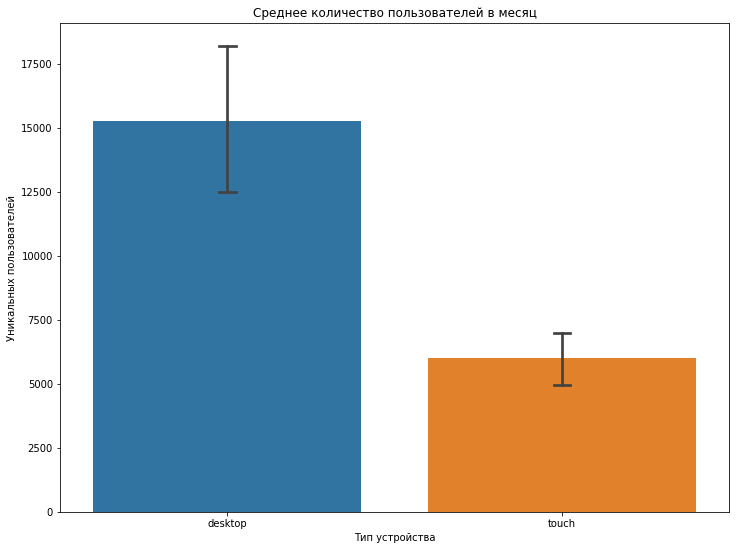

In [33]:
metric_ill('uid', 'device', 'session_month', 'месяц')

In [34]:
avg_users_per_week = visits.groupby('session_week')['uid'].nunique().mean()
print('Среднее количество уникальных пользователей в неделю:', round(avg_users_per_week, 1))

Среднее количество уникальных пользователей в неделю: 5246.5


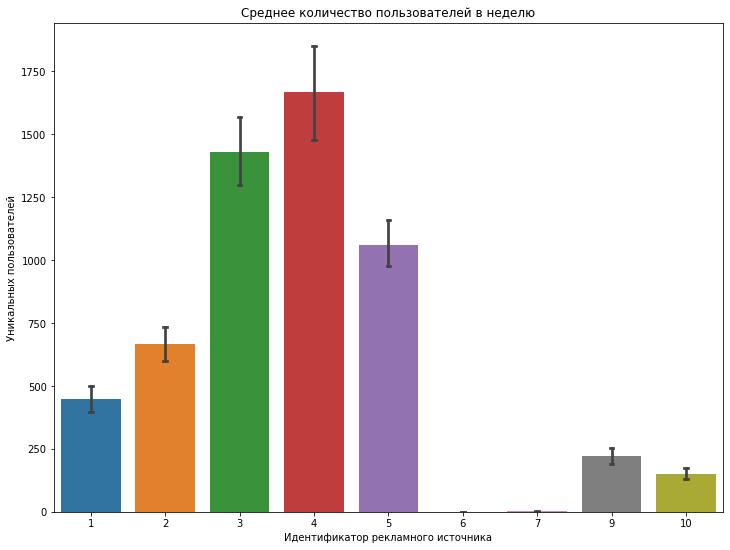

In [35]:
metric_ill('uid', 'source_id', 'session_week', 'неделю')

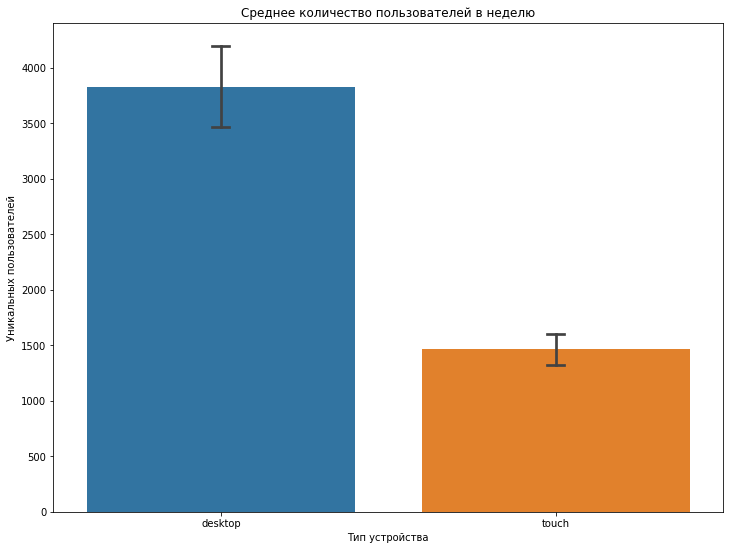

In [36]:
metric_ill('uid', 'device', 'session_week', 'неделю')

#### Число уникальных пользователей: summary

Daily Active Users (DAU) = 818.
Weekly Active Users (WAU) = 5247.
Monthly Active Users (MAU) = 20956.

Больше всего людей пользовались сайтом осенью и в начале зимы: 28.000 - 30.000 пользователей в ноябре и декабре. Меньше всего -- летом (10.000 - 13.000 уникальных пользователей).  

Показателей количества уникальных пользователей в день соответствуют измерениям количества сессий, но число пользователей на 10% меньше. Все остальные показатели и закономерности (связанные с разделением по типам устройств и рекламным источнкиам) так же совпадают.



### Продолжительность сессии

In [37]:
# Переводим единицу измерения для продолжительности сессий из секунд в минуты, деля на 60

visits['session_duration'] = visits['session_duration'] / 60
avg_session_duration = visits['session_duration'].mean()
print('Средняя продолжительность сессии составляет {:.1f} минут'.format(avg_session_duration))

Средняя продолжительность сессии составляет 11.9 минут


In [38]:
visits['session_duration'].describe()

count    323604.000000
mean         11.902825
std          17.105824
min           0.316667
25%           2.000000
50%           6.000000
75%          15.000000
max         711.000000
Name: session_duration, dtype: float64

In [39]:
visits['session_duration'].quantile(0.99)

78.0

In [40]:
visits['session_duration'].quantile(0.01)

1.0000000000000002

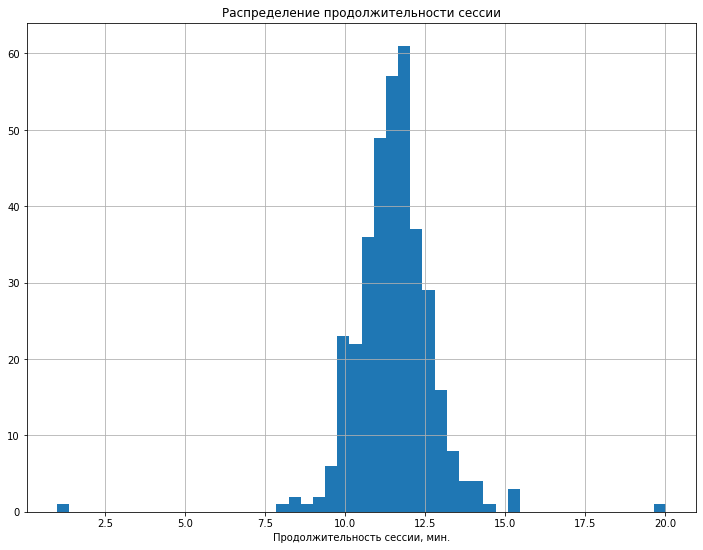

In [41]:
visits.groupby('session_date')['session_duration'].mean().hist(figsize=(12,9), bins=50)
plt.title('Распределение продолжительности сессии')
plt.xlabel('Продолжительность сессии, мин.')
plt.show()

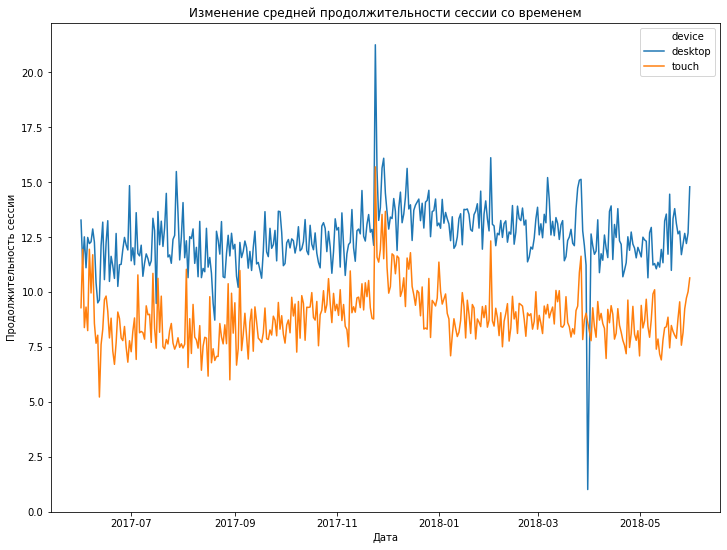

In [42]:
vis = visits.groupby(['device','session_date'])['session_duration'].mean().reset_index()
plt.figure(figsize=(12, 9))
sns.lineplot(vis['session_date'], vis['session_duration'], hue=vis['device'])
plt.ylabel('Продолжительность сессии')
plt.xlabel('Дата')
plt.title('Изменение средней продолжительности сессии со временем')
plt.show()

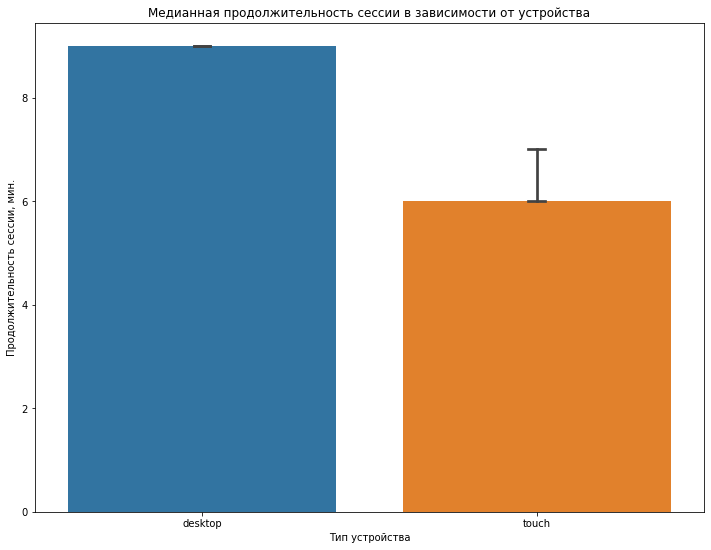

In [43]:
# На графике и в дескрайбе выше нашли день с аномально короткими сессиями на декстопах в конце марта и
# десктопную сессию продолжительностью в 10+ часов. Чтобы они не влияли на дальнейший анализ,
# исключаем их по 1%- и 99%-квантилям (будем рассматривать сессии продолжительностью от 1 до 78 минут)
# кажется, вполне честные границы, характеризующие нормальное бытовое использование подобного сервиса. 

z = (visits.loc[(visits['session_duration'] < visits['session_duration'].quantile(0.99)) & 
              (visits['session_duration'] > visits['session_duration'].quantile(0.01))])
fig, ax = plt.subplots(figsize=(12,9))
sns.barplot(x='device', y='session_duration', data=z, capsize=0.05, estimator=np.median, order=['desktop', 'touch'])
plt.xlabel('Тип устройства')
plt.ylabel('Продолжительность сессии, мин.')
plt.title('Медианная продолжительность сессии в зависимости от устройства')
plt.show()

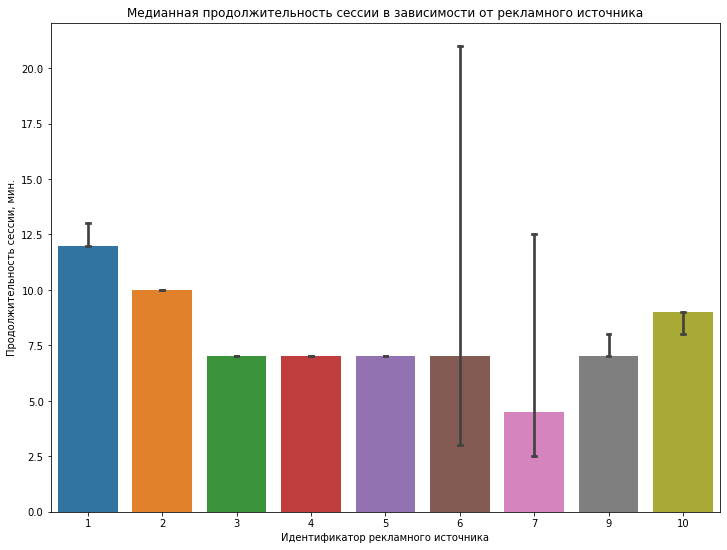

In [44]:
z = (visits.loc[(visits['session_duration'] < visits['session_duration'].quantile(0.99)) & 
              (visits['session_duration'] > visits['session_duration'].quantile(0.01))])
fig, ax = plt.subplots(figsize=(12,9))
sns.barplot(x='source_id', y='session_duration', data=z, estimator=np.median, capsize=0.05)
plt.xlabel('Идентификатор рекламного источника')
plt.ylabel('Продолжительность сессии, мин.')
plt.title('Медианная продолжительность сессии в зависимости от рекламного источника')
plt.show()

#### Продолжительность сессии: summary

Распределение продолжительности сессий нормально, среднее значение продолжительности сессии составляет 11.9 минут, хотя медианное значение -- 6 минут. Половина всех сессий длится от 2 до 15 минут. Наибольшая продолжительность сессий наблюдается в конце ноября-начале декабря. 

С десктопных устройств подключения длятся дольше, чем с портативных. Дольше всего люди задерживаются на сайте при переходе с первого рекламного источника, меньше всего -- при переходе с источника номер 5 (данных по 6 и 7 источникам мало, у них огромные доверительные интервалы, в границы которых входят средние по многим другим источникам, поэтому о них ничего определенного сказать нельзя). 

### Коэффициент удержания

In [45]:
number_of_sessions = visits.groupby('uid').agg({'start_ts' : 'count'})
returned_users = len(number_of_sessions.loc[number_of_sessions['start_ts'] > 1]) / len(number_of_sessions)
print('Доля пользователей, заходивших на сайт более одного раза:', round(returned_users, 2))

Доля пользователей, заходивших на сайт более одного раза: 0.22


In [46]:
# Добавляем к каждой строке visits информацию о том, когда соответствующей ей пользователи
# посетил сайт впервые

first_session_date = visits.groupby('uid').agg({'start_ts' : 'min'})
first_session_date.columns = ['first_session_date']
visits = visits.merge(first_session_date, on='uid')

In [47]:
# Разделяем пользователей на когорты по месяцу первого посещения

cohorts = first_session_date.copy()
cohorts.columns = ['cohort_by_month']
cohorts['cohort_by_month'] = cohorts['cohort_by_month'].dt.to_period('M')
visits = visits.merge(cohorts, on='uid')

In [48]:
visits['first_session_date2'] = visits['first_session_date'].astype('datetime64[M]')

In [49]:
visits['lifetime'] = round((visits['session_month'] - visits['first_session_date2']) / np.timedelta64(1, 'M'))

In [50]:
raw_retention = visits.pivot_table(index='cohort_by_month', columns = 'lifetime', values='uid', aggfunc='nunique')

In [51]:
raw_retention

lifetime,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
cohort_by_month,,,,,,,,,,,,
2017-06,11885.0,900.0,606.0,710.0,777.0,802.0,686.0,667.0,606.0,591.0,453.0,522.0
2017-07,11825.0,645.0,596.0,658.0,670.0,550.0,521.0,521.0,448.0,323.0,320.0,NaN
2017-08,9214.0,686.0,557.0,557.0,442.0,382.0,334.0,347.0,250.0,228.0,NaN,NaN
2017-09,15125.0,1264.0,1025.0,746.0,576.0,559.0,535.0,346.0,344.0,NaN,NaN,NaN
2017-10,23538.0,1839.0,1196.0,890.0,792.0,734.0,489.0,466.0,NaN,NaN,NaN,NaN
2017-11,24852.0,1943.0,1062.0,940.0,810.0,540.0,512.0,NaN,NaN,NaN,NaN,NaN
2017-12,23030.0,1259.0,841.0,695.0,448.0,408.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,20573.0,1189.0,778.0,501.0,396.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,20173.0,1141.0,490.0,387.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


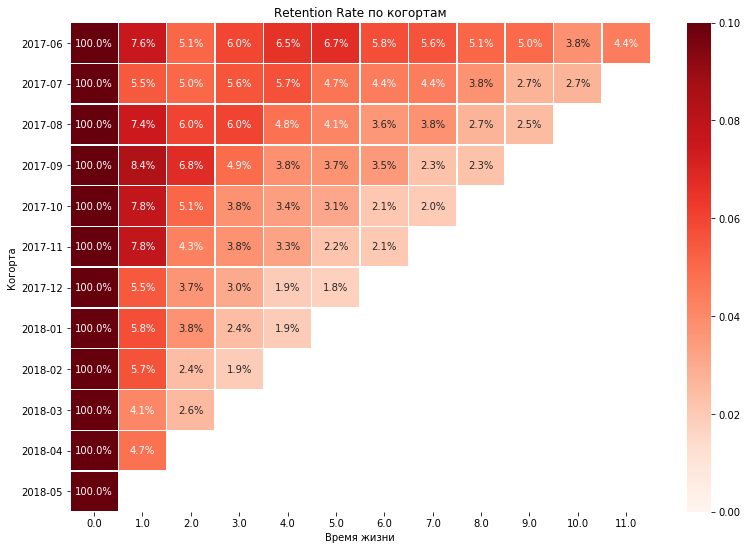

In [52]:
retention_rate_table = raw_retention[:].div(raw_retention[0], axis=0)
plt.figure(figsize=(13, 9))
sns.heatmap(retention_rate_table, cmap='Reds', annot=True, fmt='.1%', vmin = 0.0, vmax = 0.1, linewidths=0.5, linecolor='white')
plt.title('Retention Rate по когортам')
plt.ylabel('Когорта')
plt.xlabel('Время жизни')
plt.show()

In [53]:
# Эта и следующая ячейка: каждому пользователю приписываем один рекламный источник 
# ('attributed_source', рекламный источник, с которого пользователь попал на сайт впервые) 
# и один тип устройства ('attributed_device', тип устройства, с которого пользователь заходит 
# на сайт чаще всего), и добавляем эти столбцы в датафреймы visits и orders.

v = visits.groupby(['uid', 'device'])['start_ts'].count().reset_index()
v2 = v.groupby('uid')['start_ts'].max().reset_index()
v = v.merge(v2, on='uid')
device_uid_voc = v.loc[v['start_ts_x'] == v['start_ts_y']][['uid', 'device']]
device_uid_voc.columns = ['uid', 'attributed_device']
orders = orders.merge(device_uid_voc, how='left', on='uid')
visits = visits.merge(device_uid_voc, on='uid')

In [54]:
source_attribution = visits.loc[visits['start_ts'] == visits['first_session_date']][['uid', 'source_id']]
source_attribution.columns = ['uid', 'attributed_source']
visits = visits.merge(source_attribution, on='uid')
source_uid_voc = visits.groupby('uid')['attributed_source'].mean().astype('int')
orders = orders.merge(source_uid_voc, how='left', on='uid')

In [55]:
retention_by_sources = visits.pivot_table(index='attributed_source', columns='lifetime', values='uid', aggfunc='nunique')
retention_by_sources = retention_by_sources.div(retention_by_sources[0], axis=0)
round(retention_by_sources*100, 1)

lifetime,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
attributed_source,,,,,,,,,,,,
1,100.0,9.8,5.7,4.3,3.5,2.8,2.4,1.8,1.4,1.0,0.8,0.6
2,100.0,9.3,6.1,5.2,4.5,3.6,2.8,2.3,1.6,1.2,0.9,0.6
3,100.0,5.8,3.7,3.0,2.4,1.8,1.5,1.1,0.8,0.5,0.3,0.2
4,100.0,5.4,3.2,2.6,2.0,1.7,1.2,0.9,0.6,0.4,0.3,0.2
5,100.0,4.3,2.6,1.9,1.5,1.3,1.0,0.7,0.5,0.3,0.2,0.1
6,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,100.0,NaN,3.2,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100.0,11.3,8.6,6.8,5.8,4.9,3.5,2.8,2.2,1.6,1.0,0.7
10,100.0,5.1,2.7,1.9,1.5,1.3,1.2,0.7,0.3,0.3,0.2,0.3


In [56]:
retention_by_devices = visits.pivot_table(index='attributed_device', columns='lifetime', values='uid', aggfunc='nunique')
retention_by_devices = retention_by_devices.div(retention_by_devices[0], axis=0)
round(retention_by_devices*100,1)

lifetime,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
attributed_device,,,,,,,,,,,,
desktop,100.0,6.4,4.0,3.2,2.6,2.2,1.7,1.3,0.9,0.6,0.4,0.3
touch,100.0,5.8,3.4,2.6,2.1,1.5,1.2,0.9,0.6,0.4,0.3,0.2


#### Коэффициент удержания: summary

22% из всех пользователей выборки заходили на сайт более одного раза. 

По всем сформированным по первому месяцу посещения когортам наблюдается схожая динамика возвращения пользователей: каждый следующий месяц сервисом пользуются 3-6% людей. При этом коэффициент удержания для когорт 2017 года выше, чем для когорт 2018 года, и в целом чем раньше была сформирована когорта, тем она лояльнее (больше ее членов продолжают дольше пользоваться сервисом). Когорты, сформированные по первому посещению в октябре-декабре, включают вдвое больше пользователей, но и быстрее угасают, чем когорты, сформированные по летним месяцам. 

Пользователи десктопов немного лояльнее, чем пользователи портативных устройств. 

С наибольшей вероятностью возвращаются пользователи, впервые попавшие на сайт по каналу 9 рекламного источника, несколько уступают в этом показателе 1 и 2 рекламные источники. Самый низкий коэффициент удержания наблюдается для переходов с 5 и 10 рекламных источников. 

<a id='step22'></a>

## Метрики продаж

### Время до первой покупки

In [57]:
# Добавляем в orders информацию о том, когда каждый пользователь совершил свою первую покупку

first_order_date = orders.groupby('uid').agg({'buy_ts' : 'min'})
first_order_date.columns = ['first_order_date']
orders = orders.merge(first_order_date, on='uid')

In [58]:
# Добавляем к ранее созданному датафрейму с информация о первом посещении сайта по каждому пользователю

time_to_first_order = first_session_date.merge(first_order_date, on='uid', how='left')

In [59]:
proportion_of_buyers = sum(time_to_first_order['first_order_date'].notna()) / len(time_to_first_order)
print('Доля людей, совершивших хотя бы одну покупку, от общего числа пользователей:', round(proportion_of_buyers, 2))

Доля людей, совершивших хотя бы одну покупку, от общего числа пользователей: 0.17


In [60]:
# Считаем время, прошедшее от первого посещения пользователем сайта до его первой покупки

time_to_first_order['time_to_first_purchase'] = (time_to_first_order['first_order_date'] - time_to_first_order['first_session_date']).dt.total_seconds()

In [61]:
print(time_to_first_order['time_to_first_purchase'].min())
print(time_to_first_order['time_to_first_purchase'].max() / 3600 / 24)

-28325760.0
363.2944444444445


In [62]:
time_to_first_order['first_order_date'].min()

Timestamp('2017-06-01 00:10:00')

In [63]:
# Обнаруживаем, что 195 пользователей почему-то совершили покупку раньше, чем впервые посетили сайт,
# а еще 2318 человек совершили ее ровно в то же мгновение, когда впервые попали на сайт.
# Возможно, что это какие-то покупки через приложение, но в любом случае это странно. 

print(len(time_to_first_order.loc[time_to_first_order['time_to_first_purchase'] == 0]), end='\n\n')
time_to_first_order.loc[time_to_first_order['time_to_first_purchase'] < 0]

2318



,first_session_date,first_order_date,time_to_first_purchase
uid,,,
246917802374455080,2017-07-17 17:58:00,2017-07-15 06:53:00,-212700.0
331505068949795458,2017-09-14 16:05:00,2017-08-25 13:37:00,-1736880.0
504121461129059724,2018-05-06 15:02:00,2018-05-02 09:20:00,-366120.0
543499019308129333,2018-04-24 15:01:00,2018-04-24 10:11:00,-17400.0
745110943593938635,2018-02-13 18:44:00,2018-02-13 18:40:00,-240.0
...,...,...,...
17916073670301036411,2017-11-29 09:38:00,2017-11-24 20:36:00,-392520.0
17984178282926323606,2018-03-23 20:08:00,2018-03-23 20:03:00,-300.0
18294232728783843678,2017-06-27 11:34:00,2017-06-19 10:06:00,-696480.0


In [64]:
# Отбираем строки, в которых первая покупка была совершена позже, чем первое посещение сайта

time_to_first_order_cleared = time_to_first_order.loc[time_to_first_order['time_to_first_purchase'] > 0]

In [65]:
# Добавляем данные о времени до первой покупки в orders

orders = orders.merge(time_to_first_order_cleared, on = 'uid', how='left')

In [66]:
# Секунды в минуты

orders['time_to_first_purchase'] = orders['time_to_first_purchase'] / 60

In [67]:
orders['time_to_first_purchase'].describe()

count     46826.000000
mean      26463.612395
std       68067.429975
min           1.000000
25%           6.000000
50%          29.000000
75%        7454.000000
max      523144.000000
Name: time_to_first_purchase, dtype: float64

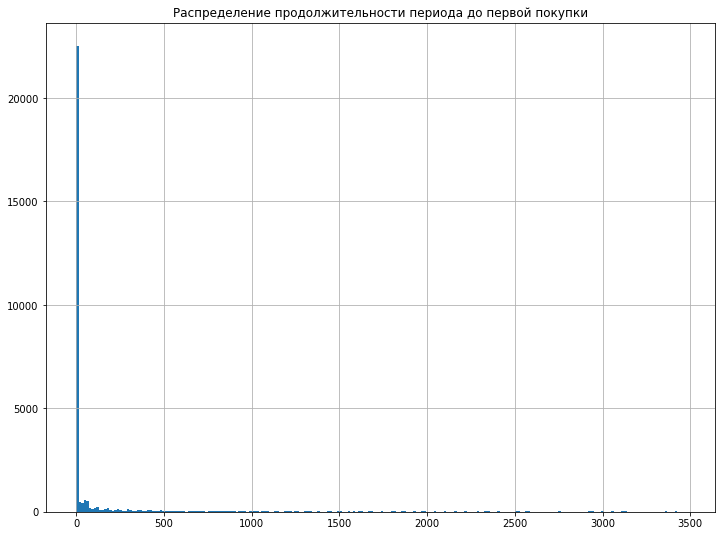

In [68]:
((time_to_first_order_cleared.loc
[time_to_first_order_cleared['time_to_first_purchase'] < time_to_first_order_cleared['time_to_first_purchase'].quantile(0.9)]['time_to_first_purchase'] / 60 / 24)
 .hist(figsize=(12,9), bins=240))
plt.title('Распределение продолжительности периода до первой покупки')
plt.show()

In [69]:
avg_time_to_purchase = orders.groupby('uid')['time_to_first_purchase'].mean().mean()/24
print('Среднее количество дней между первым посещением пользователем сайта и его первой покупкой:', round(avg_time_to_purchase, 1))

Среднее количество дней между первым посещением пользователем сайта и его первой покупкой: 1009.8


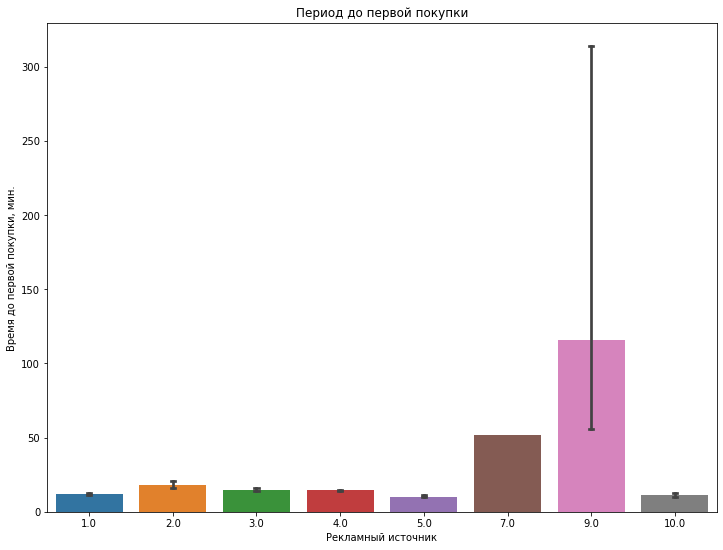

In [70]:
z = (orders.loc[orders['time_to_first_purchase'] < orders['time_to_first_purchase'].quantile(0.9)].
groupby(['uid', 'attributed_source'])['time_to_first_purchase'].median().reset_index())
fig, ax = plt.subplots(figsize=(12, 9))
sns.barplot(x='attributed_source', y='time_to_first_purchase', data=z, estimator = np.median, capsize=0.05, ax=ax)
plt.xlabel('Рекламный источник')
plt.ylabel('Время до первой покупки, мин.')
plt.title('Период до первой покупки')
plt.show()

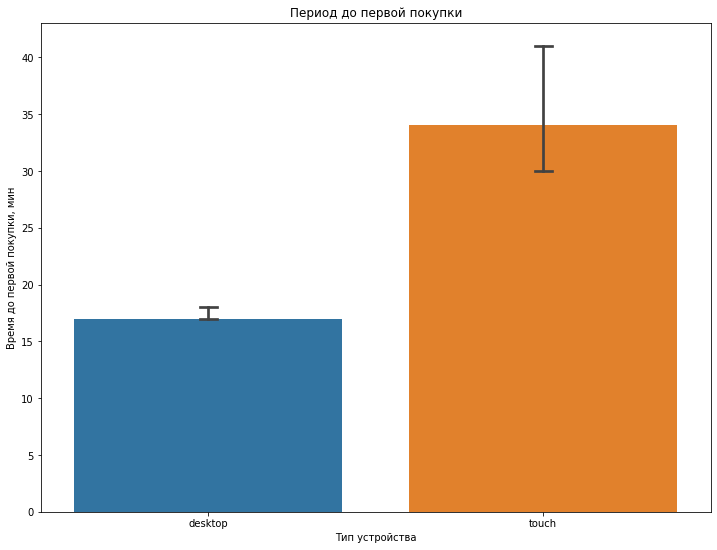

In [71]:
z = orders.groupby(['uid', 'attributed_device'])['time_to_first_purchase'].median().reset_index()
z = z.loc[z['attributed_device'].notna()]
fig, ax = plt.subplots(figsize=(12, 9))
sns.barplot(x='attributed_device', y='time_to_first_purchase', data=z, estimator = np.median, capsize=0.05, ax=ax)
plt.xlabel('Тип устройства')
plt.ylabel('Время до первой покупки, мин')
plt.title('Период до первой покупки')
plt.show()

#### Время до первой покупки: summary

Половина всех покупок совершается в течение получаса после первого посещения сайта. Быстрее всего принимают решение о покупке пользователи, перешедшие на сайт с 1, 5 и 10 рекламных источников, медленнее всего -- пользователи, впервые попавшие на сайт с 9 источника. 

Медианное время до первой покупки для пользователей портативных устройств значимо больше, чем для пользователей, заходящих на сайт с десктопов. 

## Количество покупок

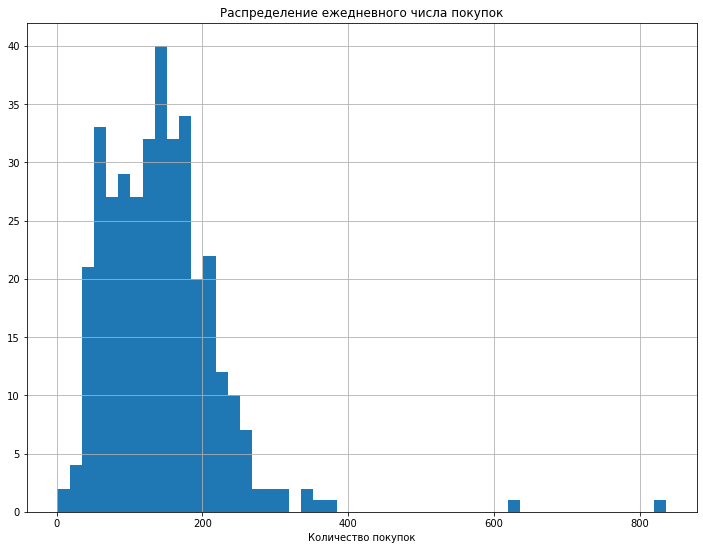

In [72]:
orders.groupby('order_date')['buy_ts'].count().hist(figsize=(12,9), bins=50)
plt.title('Распределение ежедневного числа покупок')
plt.xlabel('Количество покупок')
plt.show()

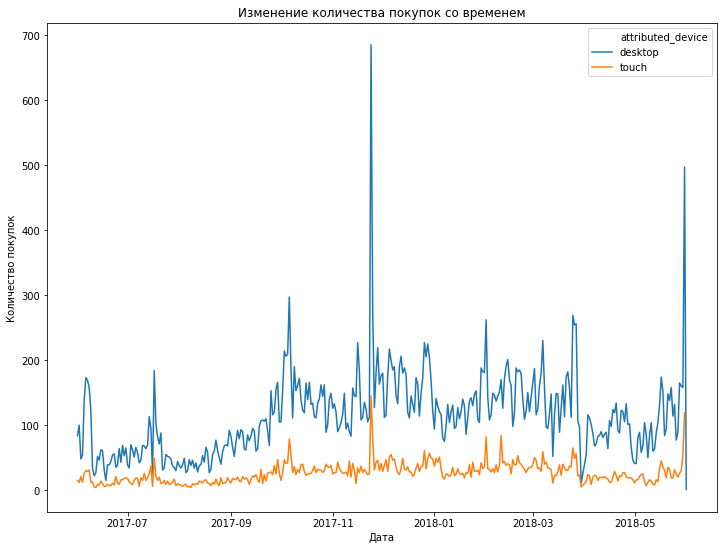

In [73]:
vis = orders.groupby(['attributed_device', 'order_date'])['buy_ts'].count().reset_index()
plt.figure(figsize=(12, 9))
sns.lineplot(vis['order_date'], vis['buy_ts'], hue=vis['attributed_device'])
plt.ylabel('Количество покупок')
plt.xlabel('Дата')
plt.title('Изменение количества покупок со временем')
plt.show()

In [74]:
orders_by_day = orders.groupby('order_date')['buy_ts'].count().mean()
print('В среднем за день пользователи делают {:.1f} заказов.'.format(orders_by_day))

В среднем за день пользователи делают 142.0 заказов.


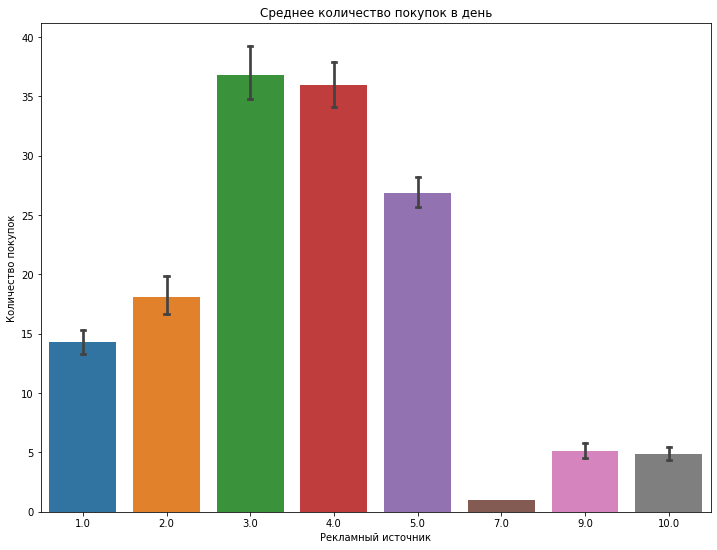

In [75]:
z = orders.groupby(['attributed_source','order_date'])['buy_ts'].count().reset_index()
fig, ax = plt.subplots(figsize=(12,9))
sns.barplot(x='attributed_source', y='buy_ts', data=z, capsize=0.05, ax=ax)
plt.xlabel('Рекламный источник')
plt.ylabel('Количество покупок')
plt.title('Среднее количество покупок в день')
plt.show()

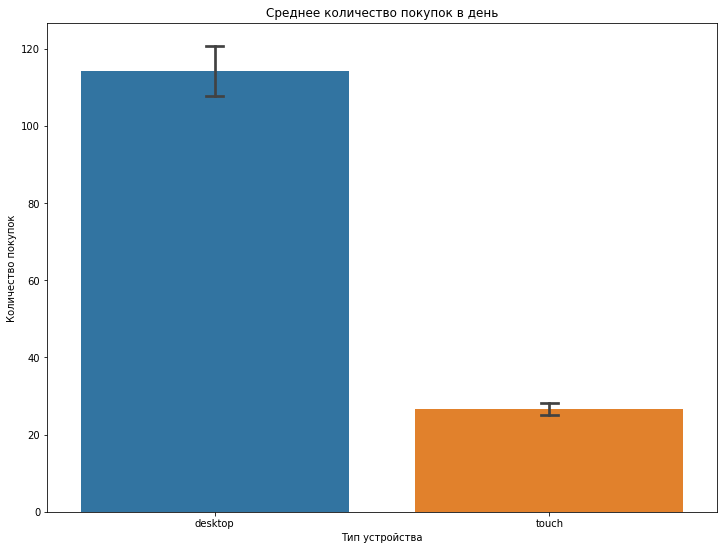

In [76]:
z = orders.groupby(['attributed_device','order_date'])['buy_ts'].count().reset_index()
fig, ax = plt.subplots(figsize=(12,9))
sns.barplot(x='attributed_device', y='buy_ts', data=z, capsize=0.05, ax=ax)
plt.xlabel('Тип устройства')
plt.ylabel('Количество покупок')
plt.title('Среднее количество покупок в день')
plt.show()

In [77]:
orders_by_week = orders.groupby('order_week')['buy_ts'].count().mean()
print('В среднем за неделю пользователи делают {:.1f} заказов.'.format(orders_by_week))

В среднем за неделю пользователи делают 994.2 заказов.


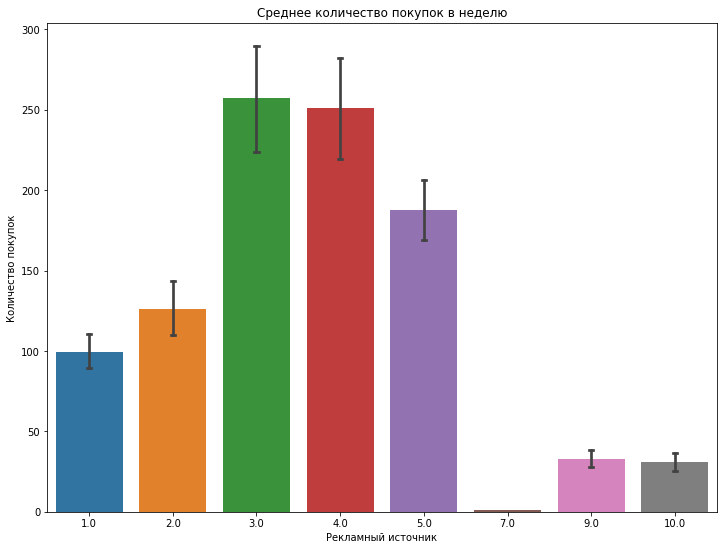

In [78]:
z = orders.groupby(['attributed_source','order_week'])['buy_ts'].count().reset_index()
fig, ax = plt.subplots(figsize=(12,9))
sns.barplot(x='attributed_source', y='buy_ts', data=z, capsize=0.05, ax=ax)
plt.xlabel('Рекламный источник')
plt.ylabel('Количество покупок')
plt.title('Среднее количество покупок в неделю')
plt.show()

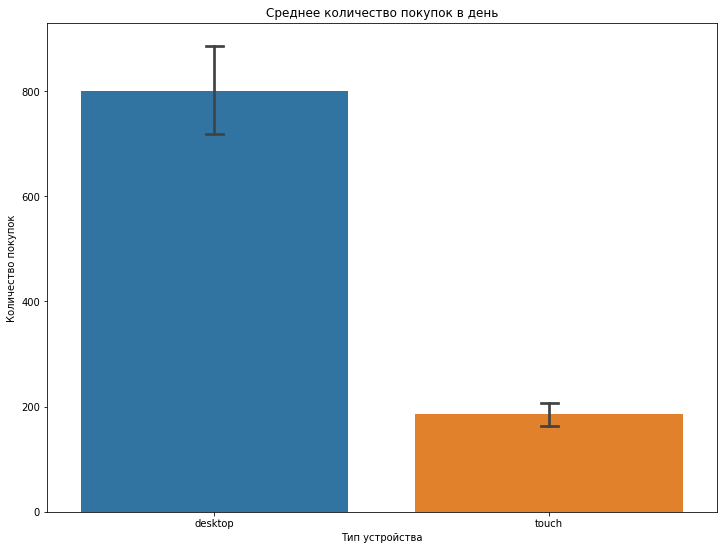

In [79]:
z = orders.groupby(['attributed_device','order_week'])['buy_ts'].count().reset_index()
fig, ax = plt.subplots(figsize=(12,9))
sns.barplot(x='attributed_device', y='buy_ts', data=z, capsize=0.05, ax=ax)
plt.xlabel('Тип устройства')
plt.ylabel('Количество покупок')
plt.title('Среднее количество покупок в день')
plt.show()

In [80]:
orders_by_month = orders.groupby('order_month')['buy_ts'].count().mean()
print('В среднем за месяц пользователи делают {:.1f} заказов.'.format(orders_by_month))

В среднем за месяц пользователи делают 3977.0 заказов.


In [81]:
orders.groupby('order_month')['buy_ts'].count()

order_month
2017-06-01    2432
2017-07-01    2436
2017-08-01    1848
2017-09-01    3463
2017-10-01    5823
2017-11-01    5810
2017-12-01    6392
2018-01-01    4812
2018-02-01    5444
2018-03-01    5463
2018-04-01    3342
2018-05-01    4435
2018-06-01       1
Name: buy_ts, dtype: int64

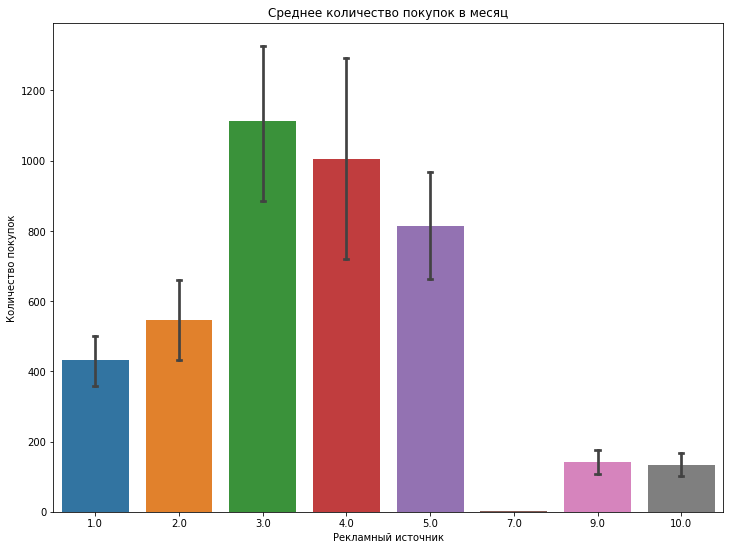

In [82]:
z = orders.groupby(['attributed_source','order_month'])['buy_ts'].count().reset_index()
fig, ax = plt.subplots(figsize=(12,9))
sns.barplot(x='attributed_source', y='buy_ts', data=z, capsize=0.05, ax=ax)
plt.xlabel('Рекламный источник')
plt.ylabel('Количество покупок')
plt.title('Среднее количество покупок в месяц')
plt.show()

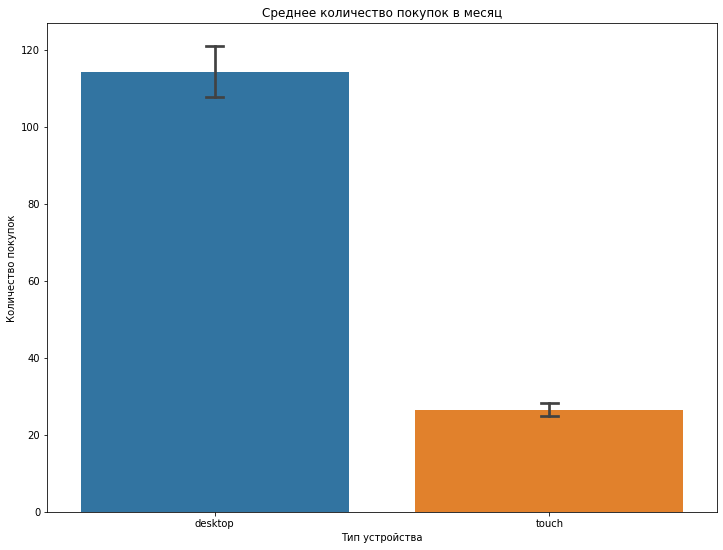

In [83]:
z = orders.groupby(['attributed_device','order_date'])['buy_ts'].count().reset_index()
fig, ax = plt.subplots(figsize=(12,9))
sns.barplot(x='attributed_device', y='buy_ts', data=z, capsize=0.05, ax=ax)
plt.xlabel('Тип устройства')
plt.ylabel('Количество покупок')
plt.title('Среднее количество покупок в месяц')
plt.show()

#### Количество покупок: summary

Ситуация с количеством покупок ожидаемо похожая на то, что мы видели в количестве сессий и уникальных пользователей. 

Распределения количества ежедневных покупок бимодально: два пика, соответствующие значениям 80 и 180 покупок в день (предположительно, выходные/будние дни), В среднем же в день пользователи делают 142 заказа, в неделю -- 994 заказа, в месяц -- 3997 заказов. Больше всего заказов было в ноябре и декабре (~6000), меньше всего -- в летние месяцы (2000-2500).

С десктопов оформляют заказы приблизительно в 3.5 раза чаще, чем с портативных устройств. 

Пользователи, впервые попавшие на сайт по каналу третьего, четвертого и пятого рекламных источников, делают значимо больше заказов, чем остальные, а те, кто зашел на сайт с 9 и 10 рекламных источников -- значимо меньше. 

In [84]:
orders_sub = orders[['uid', 'buy_ts', 'order_month', 'first_order_date_x']]

In [85]:
orders_sub['first_order_date'] = orders_sub['first_order_date_x'].astype('datetime64[M]')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
orders_sub['age'] = ((orders_sub['order_month'] - orders_sub['first_order_date']) / np.timedelta64(1, 'M')).astype('int')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
buys_by_cohorts = orders_sub.pivot_table(index='first_order_date', columns='age', values='buy_ts', aggfunc='count')

In [88]:
buyers_in_cohorts = orders_sub.groupby('first_order_date')['uid'].nunique()
buyers_in_cohorts

first_order_date
2017-06-01    2023
2017-07-01    1923
2017-08-01    1370
2017-09-01    2581
2017-10-01    4340
2017-11-01    4081
2017-12-01    4383
2018-01-01    3373
2018-02-01    3651
2018-03-01    3533
2018-04-01    2276
2018-05-01    2988
2018-06-01       1
Name: uid, dtype: int64

In [89]:
n_buys = buys_by_cohorts.div(buyers_in_cohorts, axis=0)
n_buys

age,0,1,2,3,4,5,6,7,8,9,10
first_order_date,,,,,,,,,,,
2017-06-01,1.291646,NaN,0.086505,0.111715,0.144340,0.108255,0.137420,0.086011,0.181908,0.047949,0.043005
2017-07-01,1.172647,0.052522,0.062402,0.055642,0.038482,0.043682,0.031721,0.057202,NaN,0.040562,NaN
2017-08-01,1.147445,0.083942,0.073723,0.059124,0.062774,0.046715,0.093431,0.033577,0.034307,NaN,NaN
2017-09-01,1.249516,NaN,0.127083,NaN,0.026346,0.085626,0.022084,0.024409,NaN,NaN,NaN
2017-10-01,1.175115,0.074424,0.038479,0.029263,0.054839,0.019816,0.029493,NaN,NaN,NaN,NaN
2017-11-01,1.312914,NaN,0.045087,0.085763,0.014702,0.025974,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.187315,0.062286,0.090121,0.020306,0.024641,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.144678,0.115921,0.019271,0.023421,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.222679,0.023281,0.019447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
# В среднем за первый месяц каждый покупатель делает 1.18 покупок
print('В среднем, покупатель оформляет за первый месяц', round(n_buys[0].mean(), 2), 'заказов')
# При этом мы знаем, что покупает только 17% посетителей, так что в пересчете на посетителей
print('В пересчет на пользователя:', round(n_buys[0].mean() * 0.17, 2))

В среднем, покупатель оформляет за первый месяц 1.19 заказов
В пересчет на пользователя: 0.2


In [91]:
# А вот если считать за полгода использования сервиса, то каждый покупатель делает в среднем
print('За первые полгода использования сервиса, каждый покупатель делает в среднем', round(n_buys.cumsum(axis=1)[5].mean()/6, 2), 'покупок в месяц')

За первые полгода использования сервиса, каждый покупатель делает в среднем 0.25 покупок в месяц


In [92]:
# Или можно так

orders_sub['last_date'] = orders_sub['order_month'].max()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [93]:
orders_sub['age2'] = ((orders_sub['last_date'] - orders_sub['first_order_date']) / np.timedelta64(1, 'M')).astype('int')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [94]:
# Считаем для каждого покупателя время жизни, делим на него число совершенных им покупок, в итоге примерно то же самое получили

x1 = orders_sub.groupby('uid')['buy_ts'].count().reset_index()
x2 = orders_sub.groupby('uid')['age2'].max().reset_index()
x3 = x1.merge(x2, on='uid')
x3['age2'] = x3['age2'] + 1
x3['buys_per_month'] = x3['buy_ts'] / x3['age2']
x3['buys_per_month'].mean()

0.26557399794606484

### Средний чек

In [95]:
average_check = orders['revenue'].sum() / len(orders)
print('Средний чек: {:.2f}'.format(average_check))

Средний чек: 4.98


In [96]:
orders['revenue'].describe()

count    51701.000000
mean         4.975812
std         21.562829
min          0.000000
25%          1.220000
50%          2.440000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

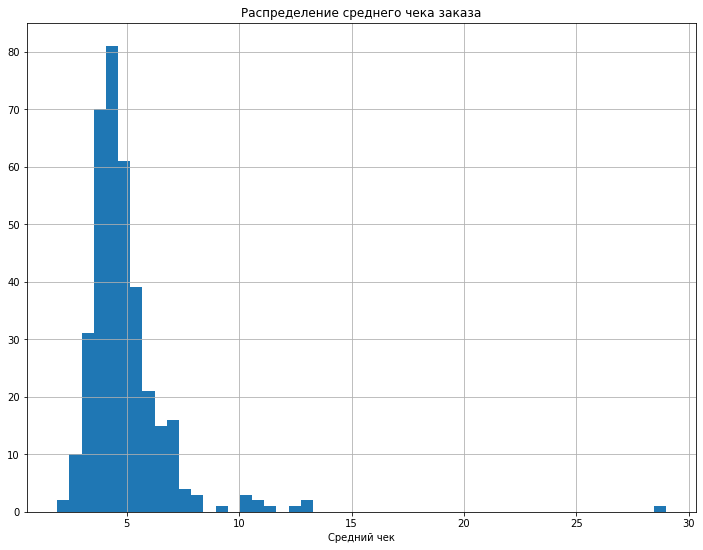

In [97]:
orders.groupby('order_date')['revenue'].mean().hist(figsize=(12,9), bins=50)
plt.title('Распределение среднего чека заказа')
plt.xlabel('Средний чек')
plt.show()

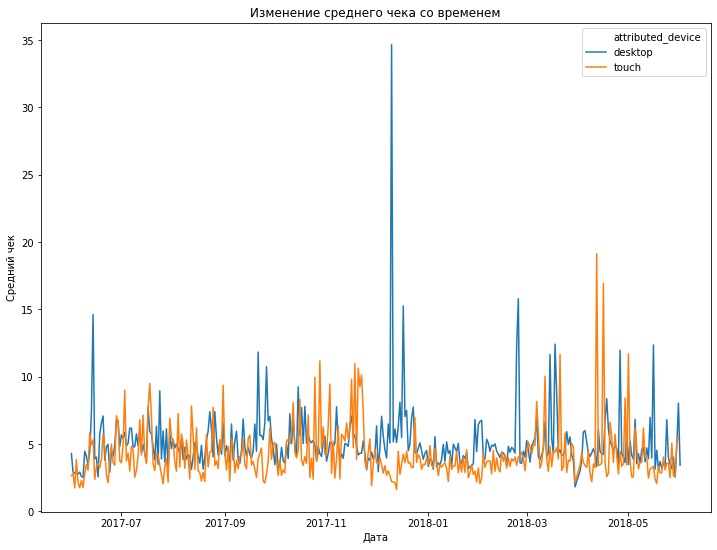

In [98]:
vis = orders.groupby(['attributed_device', 'order_date'])['revenue'].mean().reset_index()
plt.figure(figsize=(12, 9))
sns.lineplot(vis['order_date'], vis['revenue'], hue=vis['attributed_device'])
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.title('Изменение среднего чека со временем')
plt.show()

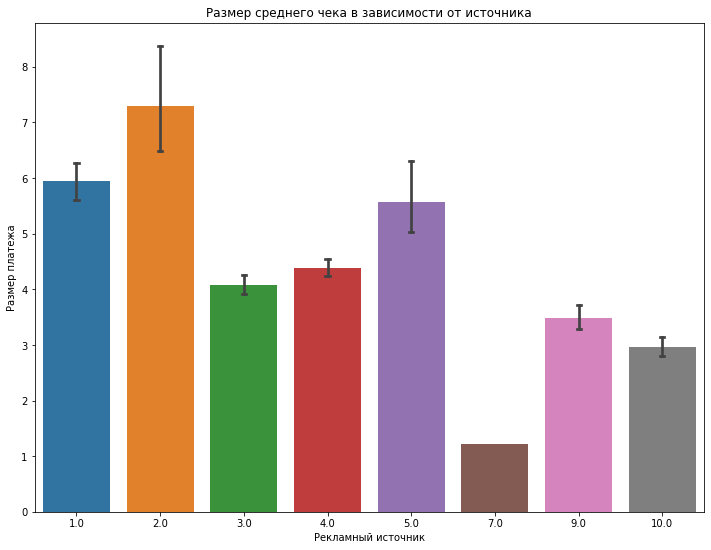

In [99]:
fig, ax = plt.subplots(figsize=(12,9))
sns.barplot(x='attributed_source', y='revenue', data=orders, capsize=0.05, ax=ax)
plt.ylabel('Размер платежа')
plt.xlabel('Рекламный источник')
plt.title('Размер среднего чека в зависимости от источника')
plt.show()

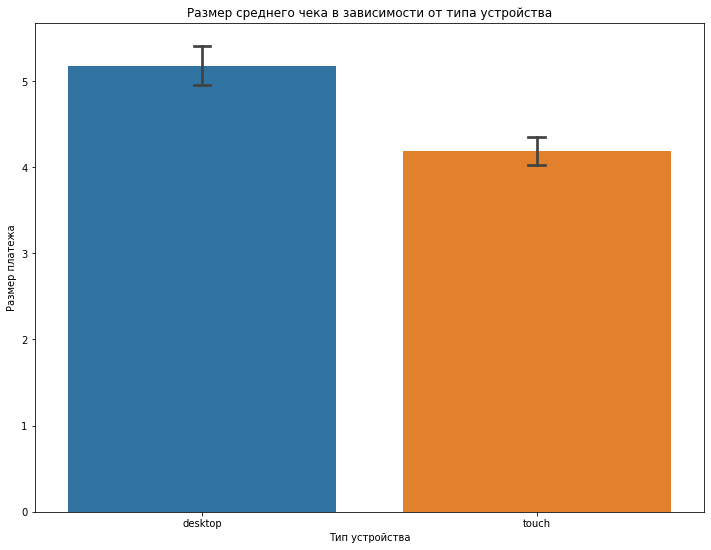

In [100]:
fig, ax = plt.subplots(figsize=(12,9))
sns.barplot(x='attributed_device', y='revenue', data=orders, capsize=0.05, ax=ax)
plt.ylabel('Размер платежа')
plt.xlabel('Тип устройства')
plt.title('Размер среднего чека в зависимости от типа устройства')
plt.show()

#### Средний чек: summary

Половина всех покупок приносят от 1.22 до 4.89 у.е. Распределение величины среднего чека с тяжелым правым хвостом, поэтому при среднем в 4.98 условных единиц, медианное значение 2.44 у.е. Чаще всего встречаются заказы на 2-3 у.е.

Величина среднего чека почти не меняется со временем, за исключением отдельных временных повышений, приходящихся, вероятно, на периоды праздников. 

Средний чек пользователей, заходящих на сайт с персонального компьютера, приблизительно на 1 у.е. выше. В среднем, самые дорогие заказы оформляют пользователи, впервые попавшие на сайт по каналам 1, 2 и 5 рекламных источников, самые дешевые -- по каналам 9 и 10 рекламных источников. 

### Lifetime Value

In [101]:
del orders['first_order_date_y']
orders = orders.rename(columns = {'first_order_date_x' : 'cohort_by_order'})
orders['cohort_by_order'] = orders['cohort_by_order'].astype('datetime64[M]')

In [102]:
# Формируем новые когорты по дате первой покупки. Решил отказаться от ииспользования когорт,
# сформированных по дате первого посещения, потому что дальше будет требоваться ответ на 
# вопрос именно 

n_buyers = orders.groupby('cohort_by_order').agg({'uid' : 'nunique'})
n_buyers.columns = ['n_buyers']
order_cohorts = orders.groupby(['order_month', 'cohort_by_order']).agg({'revenue' : 'sum'}).reset_index()
order_cohorts = order_cohorts.merge(n_buyers, on='cohort_by_order')
order_cohorts['age'] = (round((order_cohorts['order_month'] - order_cohorts['cohort_by_order']) / np.timedelta64(1, 'M'))).astype('int64')
order_cohorts['ltv'] = order_cohorts['revenue'] / order_cohorts['n_buyers']

In [103]:
order_cohorts['cohort_by_order'] = order_cohorts['cohort_by_order'].dt.to_period('M')

In [104]:
# ltv по когортам

ltv_by_cohorts = (order_cohorts.loc[order_cohorts['cohort_by_order'] < '2018-06']
                    .pivot_table(index='cohort_by_order', columns='age', values='ltv'))
ltv_by_cohorts

age,0,1,2,3,4,5,6,7,8,9,10,11
cohort_by_order,,,,,,,,,,,,
2017-06,4.861265,0.487711,0.444889,0.954671,1.022531,0.737009,0.951765,0.581592,0.557059,0.611527,0.572165,0.257459
2017-07,6.186921,0.336927,0.623531,0.371529,0.184098,0.171326,0.120208,0.148809,0.163645,0.149371,0.155673,NaN
2017-08,5.406562,0.484847,0.459372,0.391277,0.498066,0.315883,0.210664,0.409467,0.292212,0.190029,NaN,NaN
2017-09,5.729640,1.120728,0.522019,3.975804,0.400628,0.647664,0.702790,0.243758,0.186966,NaN,NaN,NaN
2017-10,5.146030,0.568159,0.195880,0.158157,0.156221,0.120668,0.084816,0.117145,NaN,NaN,NaN,NaN
2017-11,5.298824,0.406908,0.207581,0.326229,0.148282,0.053999,0.115856,NaN,NaN,NaN,NaN,NaN
2017-12,4.879617,0.262368,0.932640,1.075437,0.316443,0.341364,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.211278,0.299288,0.316146,0.144082,0.062843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.304634,0.284933,0.080189,0.074864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
# и кумулятивное

ltv_by_cohorts2 = ltv_by_cohorts.cumsum(axis=1)
ltv_by_cohorts2

age,0,1,2,3,4,5,6,7,8,9,10,11
cohort_by_order,,,,,,,,,,,,
2017-06,4.861265,5.348977,5.793866,6.748537,7.771068,8.508077,9.459842,10.041434,10.598492,11.210020,11.782185,12.039644
2017-07,6.186921,6.523848,7.147379,7.518908,7.703006,7.874332,7.994540,8.143349,8.306994,8.456365,8.612038,NaN
2017-08,5.406562,5.891409,6.350781,6.742058,7.240124,7.556007,7.766672,8.176139,8.468350,8.658380,NaN,NaN
2017-09,5.729640,6.850368,7.372387,11.348191,11.748818,12.396482,13.099272,13.343030,13.529996,NaN,NaN,NaN
2017-10,5.146030,5.714189,5.910069,6.068226,6.224447,6.345115,6.429931,6.547076,NaN,NaN,NaN,NaN
2017-11,5.298824,5.705731,5.913313,6.239542,6.387824,6.441823,6.557679,NaN,NaN,NaN,NaN,NaN
2017-12,4.879617,5.141985,6.074625,7.150062,7.466505,7.807869,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.211278,4.510566,4.826712,4.970795,5.033638,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.304634,4.589567,4.669756,4.744621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


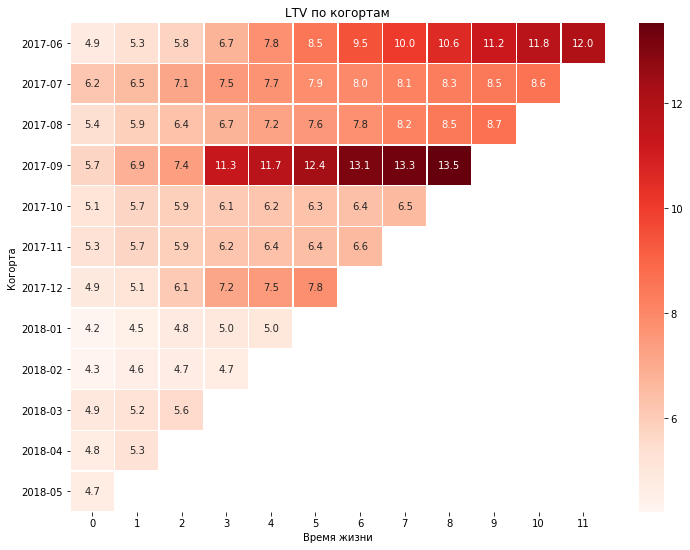

In [106]:
plt.figure(figsize=(12, 9))
sns.heatmap(ltv_by_cohorts2, cmap='Reds', annot=True, fmt='.1f', linewidths=0.5, linecolor='white')
plt.title('LTV по когортам')
plt.ylabel('Когорта')
plt.xlabel('Время жизни')
plt.show()

In [107]:
orders['age'] = (round((orders['order_month'] - orders['cohort_by_order']) / np.timedelta64(1, 'M'))).astype('int64')

In [108]:
# ltv по источникам

ltv_by_sources = orders.pivot_table(index='attributed_source', columns='age', values='revenue', aggfunc='sum')
ltv_by_sources = ltv_by_sources.div(orders.groupby('attributed_source')['uid'].count(), axis=0)
cum_ltv_by_sources = ltv_by_sources.cumsum(axis=1)
cum_ltv_by_sources

age,0,1,2,3,4,5,6,7,8,9,10,11
attributed_source,,,,,,,,,,,,
1.0,3.601716,4.125369,4.578657,4.923047,5.126990,5.252505,5.374626,5.564029,5.728667,5.813209,5.879396,5.940297
2.0,3.640251,4.419656,5.289390,6.151727,6.526238,6.811011,7.006654,7.111792,7.183073,7.218755,7.282951,7.297724
3.0,3.523148,3.729815,3.841432,3.917316,3.972608,4.010352,4.031402,4.049301,4.061310,4.067150,4.070621,4.071946
4.0,3.617957,3.770715,3.847926,3.954125,4.036105,4.127075,4.263120,4.295840,4.310219,4.341286,4.382327,4.385015
5.0,3.517396,3.690992,3.827818,4.922981,5.079073,5.263628,5.365131,5.438644,5.490779,5.552932,5.563328,5.569014
7.0,1.220000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.0,2.571445,2.773318,2.945637,3.091392,3.178379,3.260059,3.330141,3.382689,3.466647,3.477657,3.483147,NaN
10.0,2.681483,2.788723,2.879706,2.922572,2.937491,2.945807,2.952804,2.963004,2.965106,2.967209,NaN,NaN


In [109]:
# ltv по типам устройств

ltv_by_devices = orders.pivot_table(index='attributed_device', columns='age', values='revenue', aggfunc='sum')
ltv_by_devices = ltv_by_devices.div(orders.groupby('attributed_device')['uid'].count(), axis=0)
cum_ltv_by_devices = ltv_by_devices.cumsum(axis=1)
cum_ltv_by_devices

age,0,1,2,3,4,5,6,7,8,9,10,11
attributed_device,,,,,,,,,,,,
desktop,3.486305,3.773872,4.046889,4.537860,4.698792,4.840417,4.958396,5.030901,5.084594,5.125215,5.15869,5.170861
touch,3.618635,3.912691,4.013914,4.059205,4.093049,4.121586,4.141082,4.156213,4.165702,4.175592,4.18230,4.183821


In [110]:
# средний ltv за 6 месяцев жизни

value_for_six_months = ltv_by_cohorts[[0,1,2,3,4,5]][:7].cumsum(axis=1)[5].mean()
print('В среднем, каждый покупатель приносит {:.2f} за 6 месяцев использования сервиса'.format(value_for_six_months))

В среднем, каждый покупатель приносит 8.13 за 6 месяцев использования сервиса


#### Lifetime Value: summary

Средний показатель LTV пользователя через 6 месяцев составляет 8.13 у.е.

Хотя за первые месяцы использование сервиса пользователи прикладных устройств приносят больше денег, после второго месяца рост их суммарной прибыли от них начинает замедляться и почти останавливается, тогда как пользователи десктопов остаются активными дольше и уже после 3-го месяца принесенная ими в пересчете на человека суммарная прибыль начинает значительно превышать прибыль от пользователей портативных устройств. 

Показатель LTV для пользователей, попавших на сайт по каналам 1 и 2 рекламных источников выше и растет быстрее с увеличением времени жизни, чем для других рекламных источников. 

<a id='step23'></a>

## Метрики маркетинга

### Траты на маркетинг

In [111]:
all_costs = costs['costs'].sum()
print('Всего на привлечение пользователей было потрачено {:.0f}'.format(all_costs))

Всего на привлечение пользователей было потрачено 329132


In [112]:
costs['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10])

In [113]:
# Траты на каждый источник

costs_by_source = costs.groupby('source_id').agg({'costs' : 'sum'})
costs_by_source

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


In [114]:
#И в процентах от общих трат

(costs_by_source / all_costs) * 100

,costs
source_id,
1,6.329769
2,13.005751
3,42.937725
4,18.555981
5,15.725350
9,1.676378
10,1.769046


In [115]:
# Траты по месяцам

costs_by_month = costs.groupby('payment_month')['costs'].sum()
costs_by_month

payment_month
2017-06-01    18015.00
2017-07-01    18240.59
2017-08-01    14790.54
2017-09-01    24368.91
2017-10-01    36322.88
2017-11-01    37907.88
2017-12-01    38315.35
2018-01-01    33518.52
2018-02-01    32723.03
2018-03-01    30415.27
2018-04-01    22289.38
2018-05-01    22224.27
Name: costs, dtype: float64

#### Траты на маркетинг: summary

Всего на привлечение покупателей было потрачено 329132. 

Из них 43% на третий рекламный источник, 18.5 и 15.7 на 4 и 5 источники соответственно, на остальные -- меньше. Больше всего денег на маркетинг расходовалось в ноябре и декабре, меньше всего -- в летние месяцы. 

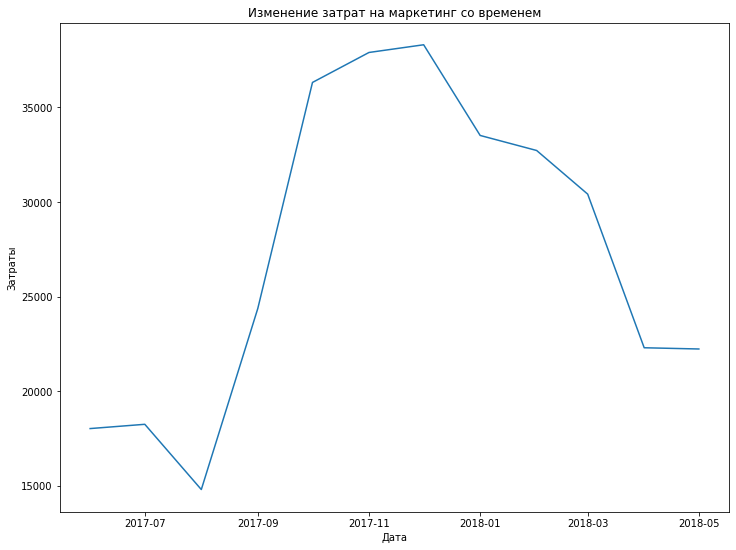

In [116]:
vis = costs_by_month.reset_index()
plt.figure(figsize=(12, 9))
sns.lineplot(vis['payment_month'], vis['costs'])
plt.ylabel('Затраты')
plt.xlabel('Дата')
plt.title('Изменение затрат на маркетинг со временем')
plt.show()

### Стоймость привлечения покупателя (CAC)

In [117]:
# Считаем количество покупателей, впервые зашедших на сайт по каждому из рекламных источников

buyers_by_source = orders.groupby('attributed_source')['uid'].count()
buyers_by_source.columns = ['n_buyers']

In [118]:
buyer_source_costs = costs_by_source.join(buyers_by_source)

In [119]:
buyer_source_costs

,costs,uid
source_id,,
1,20833.27,5182
2,42806.04,6561
3,141321.63,13370
4,61073.60,13045
5,51757.10,9767
9,5517.49,1703
10,5822.49,1598


In [120]:
cac_by_source = buyer_source_costs['costs'] / buyer_source_costs['uid']
cac_by_source

source_id
1      4.020315
2      6.524316
3     10.570055
4      4.681763
5      5.299181
9      3.239865
10     3.643611
dtype: float64

In [121]:
cac_by_source.mean()

5.4255864737186155

#### Стоймость привлечения покупателя: summary

Дороже всего обходится привлечения покупателя через третий рекламный источник (10.57), на втором месте по затратности рекламный источник 2 (6.52), дешевле всего обходится привлечение клиентов через 9 и 10 рекламные источники (3.23 и 3.64).

### Окупаемость расходов (ROI)

In [122]:
costs_by_month = costs.groupby('payment_month')['costs'].sum()
costs_by_month

payment_month
2017-06-01    18015.00
2017-07-01    18240.59
2017-08-01    14790.54
2017-09-01    24368.91
2017-10-01    36322.88
2017-11-01    37907.88
2017-12-01    38315.35
2018-01-01    33518.52
2018-02-01    32723.03
2018-03-01    30415.27
2018-04-01    22289.38
2018-05-01    22224.27
Name: costs, dtype: float64

In [123]:
costs_by_month = costs_by_month.reset_index()
costs_by_month['payment_month'] = costs_by_month['payment_month'].dt.to_period('M')

In [124]:
# Добавляем в датафрейм с когортами costs, cac, roi

roi_cohorts = order_cohorts.merge(costs_by_month, left_on='cohort_by_order', right_on='payment_month')
roi_cohorts['cac'] = roi_cohorts['costs'] / roi_cohorts['n_buyers']

In [125]:
roi_cohorts['roi'] = roi_cohorts['ltv'] / roi_cohorts['cac']

In [126]:
roi_cohorts

,order_month,cohort_by_order,revenue,n_buyers,age,ltv,payment_month,costs,cac,roi
0,2017-06-01,2017-06,9834.34,2023,0,4.861265,2017-06,18015.00,8.905091,0.545897
1,2017-07-01,2017-06,986.64,2023,1,0.487711,2017-06,18015.00,8.905091,0.054768
2,2017-08-01,2017-06,900.01,2023,2,0.444889,2017-06,18015.00,8.905091,0.049959
3,2017-09-01,2017-06,1931.30,2023,3,0.954671,2017-06,18015.00,8.905091,0.107205
4,2017-10-01,2017-06,2068.58,2023,4,1.022531,2017-06,18015.00,8.905091,0.114825
...,...,...,...,...,...,...,...,...,...,...
73,2018-04-01,2018-03,1069.30,3533,1,0.302661,2018-03,30415.27,8.608907,0.035157
74,2018-05-01,2018-03,1117.62,3533,2,0.316337,2018-03,30415.27,8.608907,0.036745
75,2018-04-01,2018-04,10827.01,2276,0,4.757034,2018-04,22289.38,9.793225,0.485747
76,2018-05-01,2018-04,1211.87,2276,1,0.532456,2018-04,22289.38,9.793225,0.054370


In [127]:
roi_table = roi_cohorts.pivot_table(index='cohort_by_order', columns='age', values='roi')
roi_table = roi_table.cumsum(axis=1).round(2)
roi_table

age,0,1,2,3,4,5,6,7,8,9,10,11
cohort_by_order,,,,,,,,,,,,
2017-06,0.55,0.60,0.65,0.76,0.87,0.96,1.06,1.13,1.19,1.26,1.32,1.35
2017-07,0.65,0.69,0.75,0.79,0.81,0.83,0.84,0.86,0.88,0.89,0.91,NaN
2017-08,0.50,0.55,0.59,0.62,0.67,0.70,0.72,0.76,0.78,0.80,NaN,NaN
2017-09,0.61,0.73,0.78,1.20,1.24,1.31,1.39,1.41,1.43,NaN,NaN,NaN
2017-10,0.61,0.68,0.71,0.73,0.74,0.76,0.77,0.78,NaN,NaN,NaN,NaN
2017-11,0.57,0.61,0.64,0.67,0.69,0.69,0.71,NaN,NaN,NaN,NaN,NaN
2017-12,0.56,0.59,0.69,0.82,0.85,0.89,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,0.42,0.45,0.49,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,0.48,0.51,0.52,0.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


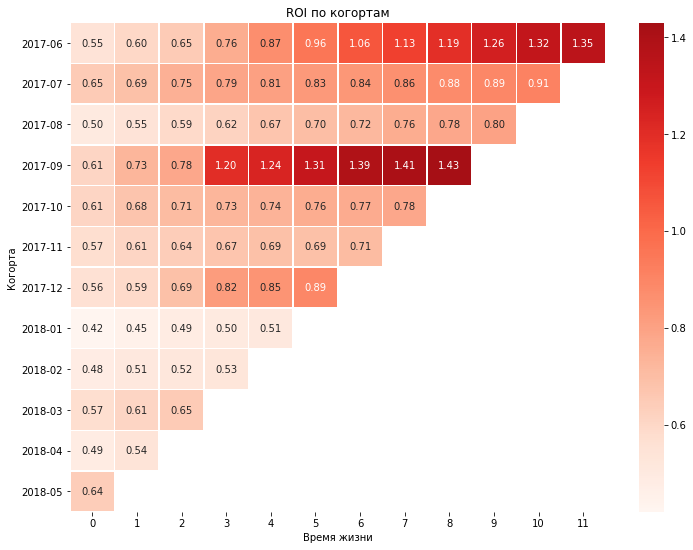

In [128]:
plt.figure(figsize=(12, 9))
sns.heatmap(roi_table, center=1, cmap='Reds', annot=True, fmt='.2f', linewidths=0.5, linecolor='white')
plt.title('ROI по когортам')
plt.ylabel('Когорта')
plt.xlabel('Время жизни')
plt.show()

In [129]:
#Смотрим, через какой промежуток времени в среднем окупаются расходы 

roi_table.mean(axis=0)

age
0     0.554167
1     0.596364
2     0.647000
3     0.735556
4     0.797500
5     0.877143
6     0.915000
7     0.988000
8     1.070000
9     0.983333
10    1.115000
11    1.350000
dtype: float64

In [130]:
# ROI по источникам

roi_by_sources = ltv_by_sources.div(cac_by_source, axis=0).cumsum(axis=1)
roi_by_sources

age,0,1,2,3,4,5,6,7,8,9,10,11
1.0,0.895879,1.026131,1.138880,1.224543,1.275271,1.306491,1.336867,1.383979,1.424930,1.445959,1.462422,1.477570
2.0,0.557951,0.677413,0.810719,0.942892,1.000295,1.043942,1.073929,1.090044,1.100969,1.106438,1.116278,1.118542
3.0,0.333314,0.352866,0.363426,0.370605,0.375836,0.379407,0.381398,0.383092,0.384228,0.384780,0.385109,0.385234
4.0,0.772777,0.805405,0.821897,0.844580,0.862091,0.881521,0.910580,0.917569,0.920640,0.927276,0.936042,0.936616
5.0,0.663762,0.696521,0.722341,0.929008,0.958464,0.993291,1.012445,1.026318,1.036156,1.047885,1.049847,1.050920
7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.0,0.793689,0.855998,0.909185,0.954173,0.981022,1.006233,1.027864,1.044083,1.069997,1.073396,1.075090,NaN
10.0,0.735941,0.765374,0.790344,0.802109,0.806203,0.808486,0.810406,0.813205,0.813782,0.814359,NaN,NaN


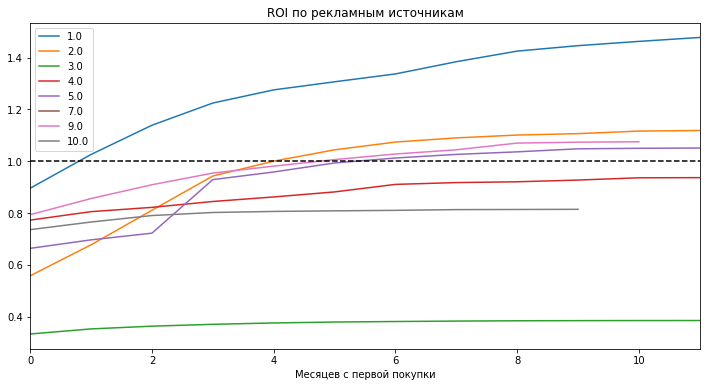

In [131]:
roi_by_sources.T.plot(figsize=(12,6))
plt.axhline(y=1, label='Уровень окупаемость', color='black', linestyle='--')
plt.title('ROI по рекламным источникам')
plt.xlabel('Месяцев с первой покупки')
plt.show()

#### Окупаемость расходов: summary

В среднем, маркетинговые расходы на привлечение пользователя окупаются и он начинает приносить прибыль только на 9-й месяц использования сервиса (операционные расходы по условию не учитываем). 

Быстрее всего окупаются затраты на первый рекламный источник (на 2-й месяц), на 5-й месяц окупаются затраты на второй рекламный источник, на 6-й месяц -- на рекламный источник 9, на 7-й -- на рекламный источник 5. Затраты на привлечение покупателей через остальные рекламные источники не окупились за весь рассмотренный период (1 год). Самым убыточным в этом плане оказались вложения в рекламный источник 3, затраты на него к 12-му месяцу окупаются только на 40%.

<a id='step24'></a>

## Основные метрики: summary по шагу

Продукт
* Сессий в день: 889.
* DAU = 818. 
* WAU = 5247. 
* MAU = 20956.
* Средняя продолжительность сессии: 12 минут.
* 22% людей, зашедших на сайт, продолжают пользоваться им в дальнейшем. 

Продажи
* 142 заказа в день.
* 17% пользователей делают хотя бы один заказ.
* Средний чек: 4.98.
* Медианный чек: 2.44.
* LTV за 6 месяцев: 8.13.

Маркетинг
* CAC = 5.4.
* Расходы на привлечение покупателя окупаются через 9 месяцев. 

<a id='step3'></a>

# Шаг 3. Выводы и рекомендации

На данный момент, больше всего средств тратится на привлечение покупателей через рекламную платформу 3 (43% от всех маркетинговых расходов), при этом она является самым дорогим в пересчете на привлечение одного покупателя рекламным источником (каждый покупатель здесь стоит больше 10 у.е., что более чем в полтора раза превышает величину следующего показателя). При этом LTV покупателей, привлеченных по этому каналу, для любой продолжительности жизни ниже, чем LTV клиентов, привлеченных почти по любому другому каналу. В результате, за 12 месяцев расходы на привлечение покупателя окупаются только на 40%. С 4-й рекламной платформой наблюдается похожая ситуация: в нее так же вкладывается неоправданно много средств, а инвестии не возвращаются и через 12 месяцев. Также не возвращаются инвестиции и в 10 рекламную платформу, но объем их в любом случае незначителен. 

Добиться увеличения прибыли можно значительно сократив инвестиции на 3 и 4 платформу и ивестировав их в привлечение покупателей через 1 и 2 рекламные платформы. Маркетинговые расходы на первую платформу окупаются уже на второй месяц, благодаря низкой стоймости привлечения покупателя (4 у.е.). Расходы на вторую платформу окупаются на 5-й месяц, но при этом клиенты, пришедшие по этому каналу, отличаются самой высокой лояльностью и дольше всех остальных продолжают пользоваться сервисом. 

Расходы на 5 рекламную платформу окупаются только на 7 месяц, при этом, учитывая низкий показатель ROI, несмотря на то, что она преодолевает порог окупаемости, прибыли пришедшие с нее клиенты почти не приносят. 
Расходы на 9-ю платформу тоже окупатются только через 6 месяцев, но при этом для нее ниже, по сравнению с 5 источником, стооймость привлечения покупателя с одной стороны, и выше лояльность привлеченных клиентов с другой стороны, поэтому 9-я рекламная платформа является более удачным способ инвестирования, чем платформа 5, хотя сейчас в нее вкладывается 1.7% от общих маркетинговых расходов, а в платформу 5 -- 15.7%. 

Рекомендации.
 * Значительно сократить инвестиции в 3 платформу. Привлечения покупателю с ее помощью обходится неоправданно дорого, расходы на нее не окупаются и на половину даже за 12 месяцев.
 * Сократить расходы на 4 рекламную платформу. 
 * Не увеличивать инвестиции в 10-ю платформу: сейчас на нее приходится только 1.5% расходов, но и они не окупаются даже за год. 
 * Увеличить объем инвестиций в привлечение покупателей через 1-й и 2-й рекламные источники -- из проанализированных это самые эффективные способы привлечения покупателей. 
 * Несколько сократить расходы на 5-й рекламный источник. Хотя расходы на него окупаются через 7 месяцев, получаемая с него прибыль незначительна. 
 * Рассмотреть увеличение инвестиций в 9-ю рекламную платформу. Для нее характерны низкая стоймость привлечения покупателя и высокая лояльность привлеченных клиентов: инвестиции в нее окупаются через 6 месяцев, а выручка после этого продолжает заметно расти, обеспечивая прибыль. 